In [1]:

import os
import pandas as pd
import sys

import pathlib


In [2]:
repo_path="C:\\Users\\srg_minitower\\ibeems_data"

os.chdir(repo_path)
sys.path.insert(1,pathlib.Path(repo_path).absolute().__str__()) # repository path
os.chdir(repo_path)

from database.function_io import get_config,get_point_list
from database.query_raw_data import raw_data_query
from database.data_formatter import df_history_parser
from database.database_util import get_df_history,single_query_point
from database.function_ts import convert_to_utc

In [ ]:
project_id='hdc'

start_time="2024-01-17"
end_time="2024-01-20"

init_path = f'data/{project_id}/init.yaml'

init_config = get_config(config_path=init_path, config_format="yaml")
tz = init_config['tz']
start_time_utc = convert_to_utc(start_time, tz)
end_time_utc = convert_to_utc(end_time, tz)
credential = get_config(config_path=init_config['credential_path'], config_format="yaml")



timestamp_local is not timezone aware. It is assumed to be Asia/Seoul.
timestamp_local is not timezone aware. It is assumed to be Asia/Seoul.


In [4]:
path="/iot_lotte/2/DE-82/AI-1" # AHU4_순시유량

In [5]:
input_dict={"path":path,
            "start_time_utc":start_time_utc,
        "end_time_utc":end_time_utc,
        "credential":credential,
        "init_config":init_config,
        "query_split_days":100}
        #"variable_map":variable_map,
        #"zone_id":zid}

In [6]:
df=single_query_point(input_dict)

start http://lottemart.iptime.org:28082/sensor/data?fromDateTime=2024-07-31T23:00:00toDateTime=2024-08-30T01:00:00&path=/iot_lotte/2/DE-82/AI-1
1[{"variableName": "ID_TO_MEANING", "type": "dictionary", "supportedEngines": ["pandas"], "isLocalVariable": true}]



In [54]:
df

{'raw_df':                  timestamp_local /iot_lotte/2/DE-82/AI-1
 0      2024-07-31 23:00:00+09:00                       0
 1      2024-07-31 23:01:00+09:00                       0
 2      2024-07-31 23:02:00+09:00                       0
 3      2024-07-31 23:03:00+09:00                       0
 4      2024-07-31 23:04:00+09:00                       0
 ...                          ...                     ...
 138726 2024-11-05 10:28:00+09:00                 18.8819
 138727 2024-11-05 10:29:00+09:00                 18.6259
 138728 2024-11-05 10:30:00+09:00                 18.7101
 138729 2024-11-05 10:31:00+09:00                 18.8132
 138730 2024-11-05 10:32:00+09:00                 19.1309
 
 [138731 rows x 2 columns]}

In [46]:
import matplotlib.pyplot as plt

In [49]:
df['raw_df']['timestamp_local']

0        2024-07-31 23:00:00+09:00
1        2024-07-31 23:01:00+09:00
2        2024-07-31 23:02:00+09:00
3        2024-07-31 23:03:00+09:00
4        2024-07-31 23:04:00+09:00
                    ...           
138718   2024-11-05 10:20:00+09:00
138719   2024-11-05 10:21:00+09:00
138720   2024-11-05 10:22:00+09:00
138721   2024-11-05 10:23:00+09:00
138722   2024-11-05 10:24:00+09:00
Name: timestamp_local, Length: 138723, dtype: datetime64[ns, Asia/Seoul]

In [47]:
value=df['raw_df'].iloc[:,1].to_numpy().astype('float')
timeindex=pd.to_datetime(df['raw_df']['timestamp_local'])

<Axes: xlabel='time'>

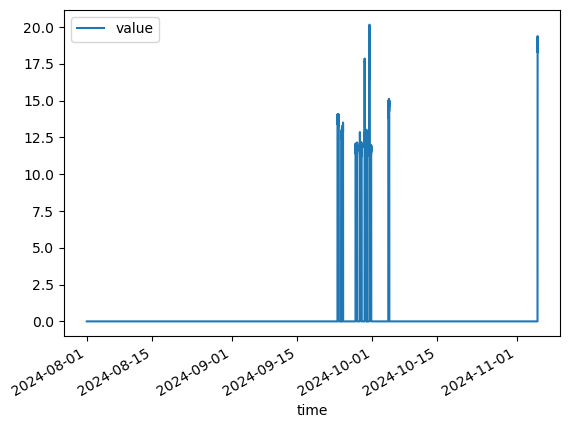

In [48]:
pd.DataFrame(data={'time':timeindex,"value":value}).set_index('time').plot()